Accuracy on testing set =  0.7333948339483395
Root Mean Squared Error testing set =  0.5306855700135948


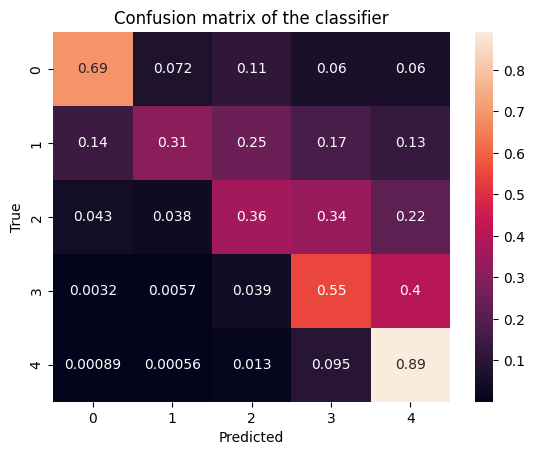

'\nhighest accuracy so far:\n(6) removed hour, month and year\nAccuracy on testing set =  0.5689957181782795\nRoot Mean Squared Error testing set =  1.5635318159961533\n\n\n'

In [29]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# Load files into DataFrames
X_train = pd.read_csv("./data/X_train.csv")
X_submission = pd.read_csv("./data/X_test.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )

# This is where you can do more feature selection
X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Date', 'neu', 'compound'])
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Date', 'neu', 'compound'])
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score', 'Date', 'neu', 'compound'])


# Learn the model

# Model (1) - KNN
# model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)

# Model (2) - Decision Tree
model = RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=8, n_estimators=50).fit(X_train_processed, Y_train)

# Model (3) - logistic regression
#model = LogisticRegression(random_state = 0).fit(X_train_processed, Y_train)

# Model (4) - Naive Bayes
#model = GaussianNB().fit(X_train_processed, Y_train)

# Model (5) - Support Vector Machine 
#model = svm.SVC().fit(X_train_processed, Y_train)

# Evaluating my model using k-fold cross-validation

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train_processed, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("Cross-validation Score = ", scores)


# Predict the score using the model
Y_test_predictions = model.predict(X_test_processed)
X_submission['Score'] = model.predict(X_submission_processed)



# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("Root Mean Squared Error testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create the submission file
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

# results of different models tried:
"""
highest accuracy so far:


Accuracy on testing set =  0.7333948339483395
Root Mean Squared Error testing set =  0.5306855700135948
"""


In [31]:
X_submission_processed.shape

(17619, 18)

In [ ]:
"""
(1) initial report with given code: 
Accuracy on testing set =  0.5165806104458132
Root Mean Squared Error testing set =  2.0065085979896047
runntime : 56s

(2) trying it with RandomForestClassifier:
Accuracy on testing set =  0.5522576878162709
Root Mean Squared Error testing set =  1.8162279898335356
runntime : 2m 1.2s

(3) Added summary length and review length to features
Accuracy on testing set =  0.5540923453850205
Root Mean Squared Error testing set =  1.766921209900854
RMSE = 1.33050
runntime : 1m 47.4s

"""